In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
#downloading open source dataset fro handwritten digits and distributing it into train and test samples where X samples 
# correspond to actual images and Y samples correspond to labels 
(X_train, Y_train), (X_test,Y_test) = keras.datasets.mnist.load_data()

In [3]:
#checking total number of samples in array X_train
len(X_train)

60000

In [4]:
#checking the value of single sample in array X_train. 
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [5]:
#checking the shape of single sample in array X_train. In this case the image has a resolution of 28x28
X_train[0].shape

(28, 28)

In [6]:
#checking the value of single sample in array Y_train.
Y_train[0]

5

In [7]:
#checking the shape of single sample in array Y_train. 
Y_train[0].shape

()

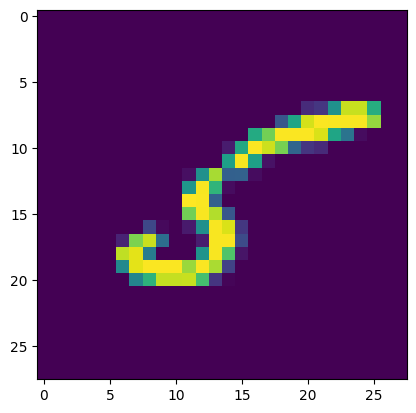

In [8]:
#using matplotlib library to visualize the actual image at one index of an array. 
plt.imshow(X_train[11])

In [9]:
#checking the shape of array X_train.
X_train.shape

(60000, 28, 28)

In [10]:
#checking the shape of array X_test.
X_test.shape

(10000, 28, 28)

In [3]:
# scaling the values of both arrays between 0 and 1 for better accuracy
X_train = X_train/255
X_test = X_test/255

In [4]:
#flattening the array into 1-d array and storing it into another array.
X_train_flattened=X_train.reshape(len(X_train),28*28)

In [13]:
#checking the shape of new array X_train_flattened.
X_train_flattened.shape

(60000, 784)

In [5]:
#flattening the array into 1-d array and storing it into another array.
X_test_flattened=X_test.reshape(len(X_test),28*28)

In [15]:
#checking the shape of new array X_test_flattened.
X_test_flattened.shape

(10000, 784)

In [16]:
#checking the value of single sample in array X_train_flattened array. 
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [17]:
#checking the value of single sample in array X_test_flattened array. 
X_test_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [9]:
model = keras.Sequential([
    # here '10' is the number of neurons of the next layer. In this case, it is the output layer for total 10 classes [0-9] 
    # 784 is the  number of neurons for input layer, for 784 pixels each
    # sigmoid activatiion function is multiplyed into (activation_of_neuron*its_weight-bias) for all neurons of each layer
    # sigmoid function brings the neuron activation values in ragne [0-1]
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

model.fit(X_train_flattened,Y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4744 - accuracy: 0.8763
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3041 - accuracy: 0.9157
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2836 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2731 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9256


In [80]:
model.evaluate(X_test_flattened,Y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.2687 - accuracy: 0.9246


[0.26872891187667847, 0.9246000051498413]

In [10]:
# pedicting values for all test images and storing them in a new array
predicted_results=model.predict(X_test_flattened)

313/313 [==============================] - 0s 1ms/step


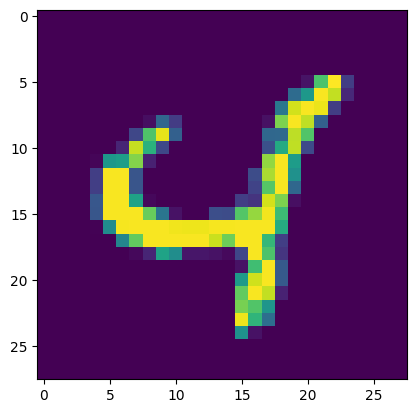

In [82]:
# visualizing the value of index that we want to prdict
plt.imshow(X_test[67])

In [11]:
# checking the value of index that we want to predict which will return an array containing all possible outputs
predicted_results[67]

array([4.2124145e-02, 5.8002093e-05, 1.8165264e-02, 2.0605259e-04,
       9.9818617e-01, 1.7898534e-03, 1.8188880e-01, 4.3669190e-02,
       1.2952089e-01, 5.9570944e-01], dtype=float32)

In [12]:
# using argmaz function to find the index of the highest value.
np.argmax(predicted_results[67])

4

In [13]:
# for confusion matrix we need whole predictions and not and array of possible prediction probabilities so we create another array and use the NumPY argmax function 
# -for the predicted array and fill the new array with the index having the highest probability

predicted_results_labels = [np.argmax(i) for (i) in predicted_results] 

In [86]:
Y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

In [87]:
predicted_results_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [88]:
#creating the confusion matrix
conf_matrix = tf.math.confusion_matrix(labels=Y_test, predictions=predicted_results_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 964,    0,    0,    1,    0,    6,    3,    4,    2,    0],
       [   0, 1119,    2,    2,    0,    1,    4,    2,    5,    0],
       [   6,    9,  919,   13,   10,    5,   11,   13,   44,    2],
       [   5,    0,   21,  894,    0,   40,    2,   14,   28,    6],
       [   1,    1,    5,    1,  920,    0,   10,    6,   10,   28],
       [   8,    3,    5,   17,    9,  790,   10,    9,   34,    7],
       [  13,    3,   10,    1,    8,   18,  900,    2,    3,    0],
       [   1,    6,   22,    3,    4,    0,    0,  969,    3,   20],
       [   7,   11,    6,   15,    9,   25,    8,   13,  874,    6],
       [  11,    7,    1,    9,   29,    8,    0,   40,    7,  897]])>

Text(95.72222222222221, 0.5, 'Actual')

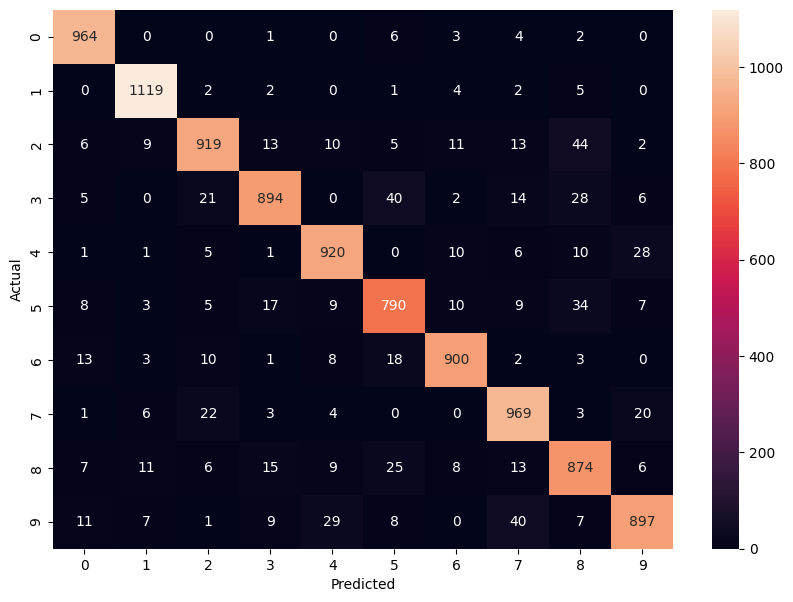

In [89]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(conf_matrix,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [20]:
# new model with a hidden layer
model2 = keras.Sequential([
    #First Layer:
    # here '100' is the number of neurons of the next layer(Hidden Layer). 
    # 784 is the  number of neurons for input layer(i.e: This layer), for 784 pixels each
    # using 'relu' activation function in this case
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    #here 10 ins the number of neurons of the output layer. The number of neurons of this layer are not defined here, because they were already 
    # defined in the previous layer i.e: 100.
    # sigmoid activatiion function is multiplyed into (activation_of_neuron*its_weight-bias) for all neurons of each layer
    # sigmoid function brings the neuron activation values in ragne [0-1]
    keras.layers.Dense(10, activation='sigmoid')
])

model2.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']

)

model2.fit(X_train_flattened,Y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2728 - accuracy: 0.9228
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1244 - accuracy: 0.9637
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0868 - accuracy: 0.9742
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0666 - accuracy: 0.9793
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0521 - accuracy: 0.9837
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0427 - accuracy: 0.9867
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0358 - accuracy: 0.9890
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0300 - accuracy: 0.9906
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0236 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.020

In [21]:
predicted_results2 = model2.predict(X_test_flattened)

313/313 [==============================] - 1s 1ms/step


In [22]:
predicted_results_labels2 = [np.argmax(i) for (i) in predicted_results2] 

In [23]:
conf_matrix2 = tf.math.confusion_matrix(labels=Y_test, predictions=predicted_results_labels2)
conf_matrix2

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 972,    0,    1,    1,    1,    0,    2,    1,    2,    0],
       [   0, 1128,    3,    0,    0,    0,    1,    0,    3,    0],
       [   3,    4, 1005,    1,    3,    0,    3,    4,    8,    1],
       [   0,    0,    9,  954,    0,   18,    0,    8,   14,    7],
       [   0,    0,    2,    1,  966,    0,    2,    1,    1,    9],
       [   1,    1,    0,    2,    1,  873,    2,    2,    9,    1],
       [   4,    3,    2,    1,    9,    7,  928,    0,    4,    0],
       [   2,    7,    7,    2,    7,    0,    0,  991,    5,    7],
       [   2,    0,    3,    2,    7,    3,    1,    1,  953,    2],
       [   1,    6,    0,    0,   13,    3,    0,    2,   10,  974]])>

Text(95.72222222222221, 0.5, 'Actual')

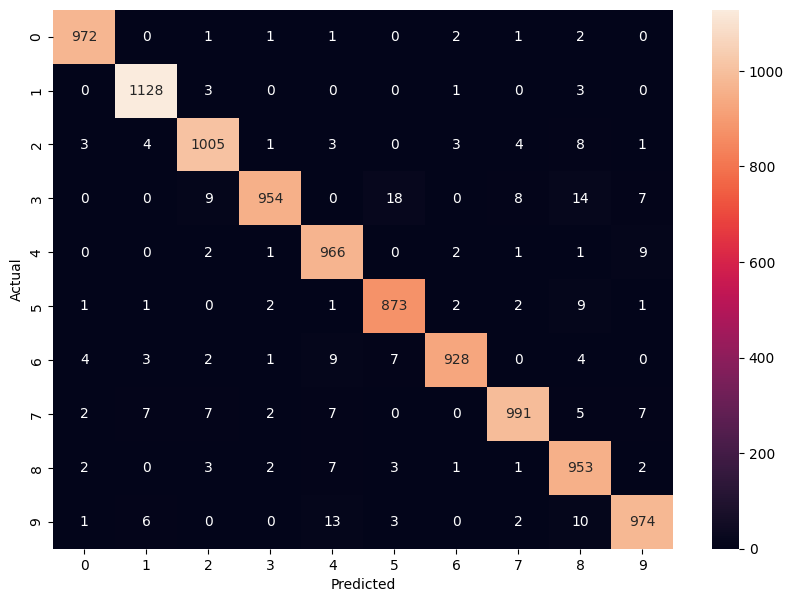

In [24]:
import seaborn as sn
plt.figure(figsize=(10,7))
sn.heatmap(conf_matrix2,annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [6]:
# new model with a hidden layer and flatten layer
# flattening the 2-d X_train array into 1_D array using this layer. Therefore no need to supply the number of neurons for the input layer. The flatten layer 
# will supply the number of neurons to the next layer.
model3 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
tensor_board_callback = tf.keras.callbacks.TensorBoard(log_dir= 'logs/', histogram_freq=1)

model3.compile(
    optimizer = 'adam',
    loss ='sparse_categorical_crossentropy',
    metrics = ['accuracy']

)
model3.fit(X_train, Y_train, epochs=10, callbacks=[tensor_board_callback])

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2772 - accuracy: 0.9220
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1255 - accuracy: 0.9630
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0878 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0655 - accuracy: 0.9803
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0528 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0412 - accuracy: 0.9876
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0348 - accuracy: 0.9893
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0292 - accuracy: 0.9908
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0229 - accuracy: 0.9930
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

In [ ]:
%load_ext tensorboard
%tensorboard --logdir 'D:\Data Science in Python\DeepLearning\logs'